# Previsão de Churn

### Análise dos Dados (Limpeza, Transformação e Previssão)

#### Bibliotecas utilizadas:

In [1]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning(Avisos)
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

#### Carregando os dados

In [2]:
data = pd.read_csv('../Data/Telco-Customer-Churn.csv', sep=',')

# Amostra dos dados
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Colunas
- customerID - Identificação do cliente
- gender - Sexo do cliente
- SeniorCitizen - Indicador se é um(a) idosa(a)	
- Partner - Indicador se tem um parceiro(a)
- Dependents - Indicador se possui dependentes
- tenure - Quantos meses o cliente esta na empresa
- PhoneService - Indicador se possui serviço de telefonia
- MultipleLines - Indicador se possui múltiplas linhas telfônicas
- InternetService - Indicador se possui serviços de internet
- OnlineSecurity - Indicador se possui serviços de segurança online
- OnlineBackup - Indicador se possui serviços de backup online
- DeviceProtection - Indicador se possui serviços de equipamentos
- TechSupport - Indicador se possui serviços de suporte técnico
- StreamingTV - Indicador se posui serviços de streaming de TV
- StreamingMovies - Indicador se possui serviços de streaming de filmes
- Contract - Tipo de contrato
- PaperlessBilling - Indicador se a cobrança é via papel ou não
- PaymentMethod - Indicador do tipo de pagamento
- MonthlyCharges - Valor mensal dos serviços
- TotalCharges - Valor total dos serviços desde o inicio
- Churn - Indicador se saiu da empresa ou não

#### Cópia do DataFrame original

In [3]:
data_copy = data.copy()

#### Informações do DataSet

In [4]:
# Qtd. linhas e colunas
data_copy.shape

(7043, 21)

In [5]:
data_copy.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Transformações no DataSet

In [7]:
# Coluna Churn - Alterando para 0 | 1
data_copy['Churn'].value_counts()

coluna_churn = {'Yes':1, 'No':0}
data_copy['Churn'].replace(coluna_churn, inplace=True)

In [8]:
# Colocando a coluna 'customerID' como indice
data_copy.set_index('customerID', inplace=True)

In [9]:
# Verificando a coluna 'TotalCharges'
# Vamos criar um filtro para verificar se há como dado espaço(s) em branco
filter_vazio = data_copy[data_copy['TotalCharges'] == ' ']

print(len(filter_vazio))

11


> Como podemos verificar temos 11 dados como vazio na coluna 'TotalCharges'

- Temos que transformá-la em '*float*'

In [10]:
# Fazendo o replace do dado vazio
data_copy['TotalCharges'] = data_copy['TotalCharges'].replace("\s+", "", regex=True)

# Transformando para float e os dado que estava vazio vai ficar como 'Nan'
data_copy['TotalCharges'] = pd.to_numeric(data_copy['TotalCharges'], errors='coerce')

# Imputando a mediana nos dados faltantes da coluna 'TotalCharges'
#mediana_TotalCharges = data_copy['TotalCharges'].median()
#data_copy.loc[data_copy['TotalCharges'].isnull(), 'TotalCharges'] = mediana_TotalCharges

# Imputando a Multiplicação da coluna 'MonthlyCharges' pela coluna 'tenure'
data_copy['TotalCharges'] = data_copy['MonthlyCharges'] * data_copy['tenure']

# Verificando como ficou o tipo da coluna
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [11]:
# Verificando se a valores ausentes
data_copy['TotalCharges'].isnull().sum()

0

### Analisando os dados

In [12]:
data_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.581350,0.265370
std,0.368612,24.559481,30.090047,2264.729447,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,394.000000,0.000000
50%,0.000000,29.000000,70.350000,1393.600000,0.000000
75%,0.000000,55.000000,89.850000,3786.100000,1.000000
max,1.000000,72.000000,118.750000,8550.000000,1.000000


> Podemos verificar que:

- Coluna 'tenure'(Quantos meses o cliente esta na empresa) - A média em que o cliente esta na empresa em 32.37 meses 

In [13]:
# Mundando o padrão de quartis para decis
data_copy.describe(percentiles=np.linspace(0, 1, 11))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.581350,0.265370
std,0.368612,24.559481,30.090047,2264.729447,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
0%,0.000000,0.000000,18.250000,0.000000,0.000000
10%,0.000000,2.000000,20.050000,82.920000,0.000000
20%,0.000000,6.000000,25.050000,265.460000,0.000000
30%,0.000000,12.000000,45.850000,548.280000,0.000000
40%,0.000000,20.000000,58.830000,949.360000,0.000000
50%,0.000000,29.000000,70.350000,1393.600000,0.000000


> Podemos verificar que:

- Coluna 'tenure'(Quantos meses o cliente esta na empresa) - 40% da base de clientes tem 20 meses que estão na empresa.

In [14]:
print(f'3Meses -> Qtd. Clientes: {len(data_copy[data_copy["tenure"] <= 3])} - Porcentagem: {round(100 * len(data_copy[data_copy["tenure"] <= 3]) / data_copy.shape[0], 2)}')

print(f'6Meses -> Qtd. Clientes: {len(data_copy[data_copy["tenure"] <= 6])} - Porcentagem: {round(100 * len(data_copy[data_copy["tenure"] <= 6]) / data_copy.shape[0], 2)}')

print(f'12Meses -> Qtd. Clientes: {len(data_copy[data_copy["tenure"] <= 12])} - Porcentagem: {round(100 * len(data_copy[data_copy["tenure"] <= 12]) / data_copy.shape[0], 2)}')


3Meses -> Qtd. Clientes: 1062 - Porcentagem: 15.08
6Meses -> Qtd. Clientes: 1481 - Porcentagem: 21.03
12Meses -> Qtd. Clientes: 2186 - Porcentagem: 31.04


In [15]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="Set2")

> Verificando a coluna 'tenure'

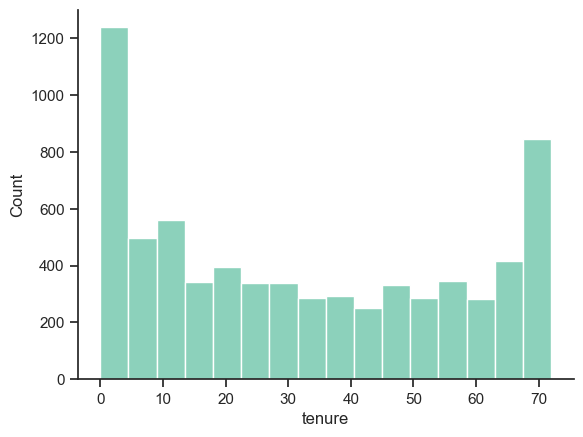

In [16]:
plt.tight_layout()
sns.histplot(data=data_copy, x='tenure')
plt.show()

> Coluna 'Churn'

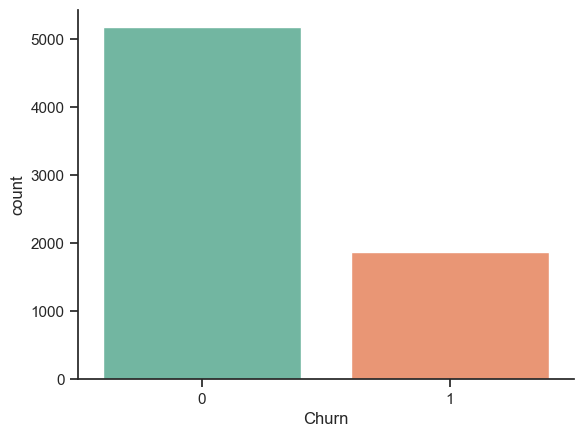

In [17]:
sns.countplot(x='Churn', data=data_copy);

> Podemos verificar que:

- Coluna 'Churn' esta bem desbalaceada.

In [18]:
print('Se o modelo chutar tudo como "Não saiu da empresa" teremos uma "acurácia" de:')
ac = round(100 * len(data_copy[data_copy['Churn'] == 0]) / data_copy.shape[0], 2)
print(f'{ac}%')

Se o modelo chutar tudo como "Não saiu da empresa" teremos uma "acurácia" de:
73.46%


#### Outros Gráficos

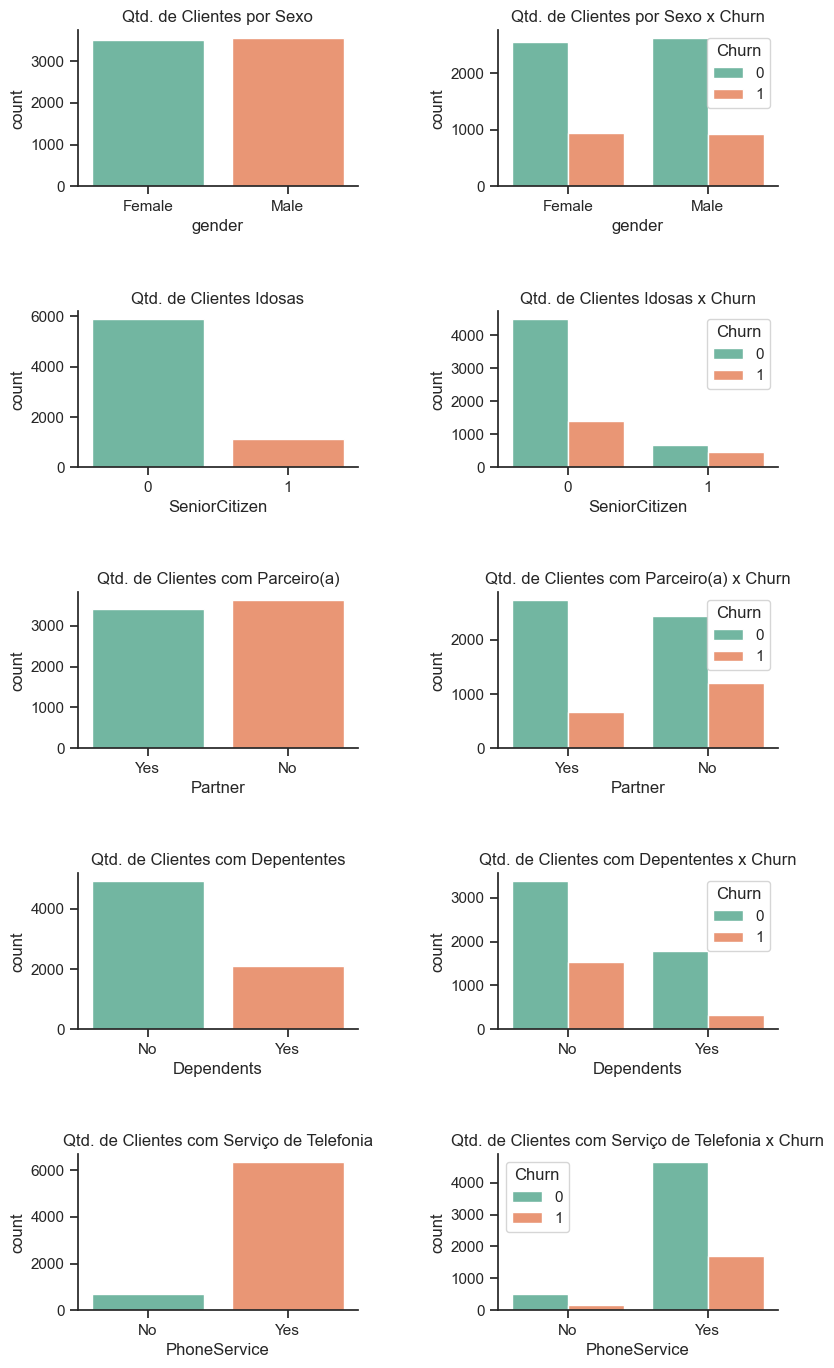

In [19]:
fig, axes = plt.subplots(5, 2, figsize=(10, 16))
# linha 1
sns.countplot(x='gender', data=data_copy, ax=axes[0,0])
sns.countplot(x='gender', hue='Churn', data=data_copy, ax=axes[0,1])
axes[0,0].set_title('Qtd. de Clientes por Sexo')
axes[0,1].set_title('Qtd. de Clientes por Sexo x Churn')

# linha 2
sns.countplot(x='SeniorCitizen', data=data_copy, ax=axes[1,0])
sns.countplot(x='SeniorCitizen', hue='Churn', data=data_copy, ax=axes[1,1])
axes[1,0].set_title('Qtd. de Clientes Idosas')
axes[1,1].set_title('Qtd. de Clientes Idosas x Churn')

# linha 3
sns.countplot(x='Partner', data=data_copy, ax=axes[2,0])
sns.countplot(x='Partner', hue='Churn', data=data_copy, ax=axes[2,1])
axes[2,0].set_title('Qtd. de Clientes com Parceiro(a)')
axes[2,1].set_title('Qtd. de Clientes com Parceiro(a) x Churn')

# linha 4
sns.countplot(x='Dependents', data=data_copy, ax=axes[3,0])
sns.countplot(x='Dependents', hue='Churn', data=data_copy, ax=axes[3,1])
axes[3,0].set_title('Qtd. de Clientes com Depententes')
axes[3,1].set_title('Qtd. de Clientes com Depententes x Churn')

# Linha 5
sns.countplot(x='PhoneService', data=data_copy, ax=axes[4,0])
sns.countplot(x='PhoneService', hue='Churn', data=data_copy, ax=axes[4,1])
axes[4,0].set_title('Qtd. de Clientes com Serviço de Telefonia')
axes[4,1].set_title('Qtd. de Clientes com Serviço de Telefonia x Churn')

plt.subplots_adjust(left=0.2, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.5,  
                    hspace=0.8) 

plt.show()

<AxesSubplot: xlabel='Churn', ylabel='MonthlyCharges'>

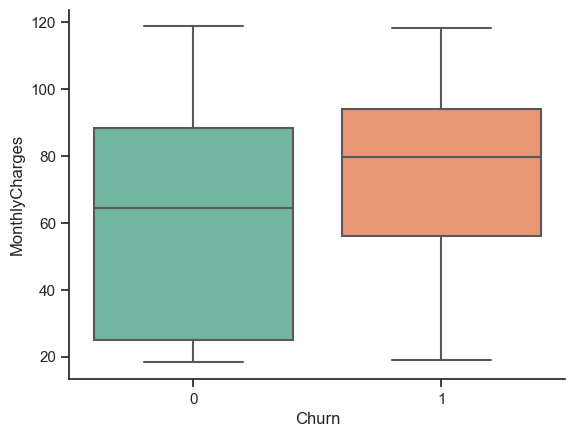

In [20]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data_copy)

#### Relação entre as featurese e a variável target

In [21]:
print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para homens e mulheres:
print(data_copy[['gender','Churn']].groupby(['gender']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para idoso(a):
print(data_copy[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para parceiro(a):
print(data_copy[['Partner','Churn']].groupby(['Partner']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para dependentes:
print(data_copy[['Dependents','Churn']].groupby(['Dependents']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço de telefonia:
print(data_copy[['PhoneService','Churn']].groupby(['PhoneService']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço de múltiplas linhas telefônicas:
print(data_copy[['MultipleLines','Churn']].groupby(['MultipleLines']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço de internet:
print(data_copy[['InternetService','Churn']].groupby(['InternetService']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço de seguraça online:
print(data_copy[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço de backup online:
print(data_copy[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço de proteção de equipamentos:
print(data_copy[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço de suporte técnico:
print(data_copy[['TechSupport','Churn']].groupby(['TechSupport']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço Streaming de Tv:
print(data_copy[['StreamingTV','Churn']].groupby(['StreamingTV']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para serviço Streaming de filmes:
print(data_copy[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean())

print('------------------------------')

# Vamos ver se a taxa de Churn é diferente para o contrato:
print(data_copy[['Contract','Churn']].groupby(['Contract']).mean())

------------------------------
           Churn
gender          
Female  0.269209
Male    0.261603
------------------------------
                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
------------------------------
            Churn
Partner          
No       0.329580
Yes      0.196649
------------------------------
               Churn
Dependents          
No          0.312791
Yes         0.154502
------------------------------
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
------------------------------
                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099
------------------------------
                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
------------------------------
                        Churn
OnlineSecurity               
No             

In [22]:
# Taxa de Churn por algumas features
anl = data_copy.groupby(['gender','SeniorCitizen','Partner','Dependents'])['Churn'].agg(['mean'])
anl

mean
gender SeniorCitizen Partner Dependents          
Female 0             No      No          0.320628
                             Yes         0.225352
                     Yes     No          0.191275
                             Yes         0.146919
       1             No      No          0.498423
                             Yes         0.333333
                     Yes     No          0.349282
                             Yes         0.205128
Male   0             No      No          0.302679
                             Yes         0.203791
                     Yes     No          0.225750
                             Yes         0.127737
       1             No      No          0.483607
                             Yes         0.200000
                     Yes     No          0.373665
                             Yes         0.272727

#### Codificação de Variáveis Categoricas

In [23]:
# Verificando colunas categoricas
col_categoricas = [coluna for coluna in data_copy.columns if coluna not in data_copy._get_numeric_data()]
col_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [24]:
# Codificando a coluna 'gender'
data_copy['gender'] = data_copy['gender'].map({'Female':1, 'Male':0})

# Codificando as colunas 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for coluna_binaria in colunas_binarias:
    data_copy[coluna_binaria] = data_copy[coluna_binaria].map({'Yes':1, 'No':0})

# Verificando como ficou cada variável
display(data_copy['gender'].value_counts())
for coluna_binaria in colunas_binarias:
    display(data_copy[coluna_binaria].value_counts())

0    3555
1    3488
Name: gender, dtype: int64

0    3641
1    3402
Name: Partner, dtype: int64

0    4933
1    2110
Name: Dependents, dtype: int64

1    6361
0     682
Name: PhoneService, dtype: int64

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

In [25]:
# Verificando colunas categoricas
col_categoricas = [coluna for coluna in data_copy.columns if coluna not in data_copy._get_numeric_data()]
col_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [26]:
for col_categorica in col_categoricas:
    display(data_copy[col_categorica].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [27]:
# Codificando variaveis ordinais
data_copy['Contract'] = data_copy['Contract'].map({
    'Month-to-month':0,
    'Two year':1,
    'One year':2
    })

data_copy['InternetService'] = data_copy['InternetService'].map({
    'No':0,
    'DSL':1,
    'Fiber optic':2 
    })

data_copy['PaymentMethod'] = data_copy['PaymentMethod'].map({
    'Mailed check':0,
    'Electronic check':1,
    'Bank transfer (automatic)':2, 
    'Credit card (automatic)':3
    })

In [28]:
# Atualizando as colunas que ainda são catgoricas
col_categoricas = [coluna for coluna in data_copy.columns if coluna not in data_copy._get_numeric_data()]

# Colunas categoricas nominais
col_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [29]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
data_onehotencoder = ohe.fit_transform(data_copy[col_categoricas])
ohe.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [30]:
data_onehotencoder = pd.DataFrame(data=data_onehotencoder, columns=ohe.get_feature_names_out(), index=data_copy.index)
data_onehotencoder.head()

,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,
7590-VHVEG,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5575-GNVDE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3668-QPYBK,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7795-CFOCW,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9237-HQITU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Unindo os Dataframe que foi realizado o Onehotencoder ao Dataframe do projeto
data_copy = pd.concat([data_copy, data_onehotencoder], axis=1)

# Removendo colunas originais do Dataframe do projeto
data_copy = data_copy.drop(col_categoricas, axis=1)

# Amostra
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,1,0,1,1,29.85,29.85,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5575-GNVDE,0,0,0,0,34,1,1,2,0,0,56.95,1936.30,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3668-QPYBK,0,0,0,0,2,1,1,0,1,0,53.85,107.70,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7795-CFOCW,0,0,0,0,45,0,1,2,0,2,42.30,1903.50,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9237-HQITU,1,0,0,0,2,1,2,0,1,1,70.70,141.40,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Criando novas variáveis

In [32]:
# Verificando como ficou o tipo das colunas
data_copy.dtypes

gender                                    int64
SeniorCitizen                             int64
Partner                                   int64
Dependents                                int64
tenure                                    int64
PhoneService                              int64
InternetService                           int64
Contract                                  int64
PaperlessBilling                          int64
PaymentMethod                             int64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int64
MultipleLines_No phone service          float64
MultipleLines_Yes                       float64
OnlineSecurity_No internet service      float64
OnlineSecurity_Yes                      float64
OnlineBackup_No internet service        float64
OnlineBackup_Yes                        float64
DeviceProtection_No internet service    float64
DeviceProtection_Yes                    

In [60]:
data_copy_final = data_copy.copy()

In [61]:
data_copy_final.drop(['gender', 'PhoneService', 'MultipleLines_No phone service', 'MultipleLines_Yes'], axis=1, inplace=True)

In [58]:
# Utilizando o 'SelectKBest' para seleção das features
X = data_copy_final.drop(['Churn'], axis=1)
y = data_copy_final['Churn']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

f_classif = SelectKBest(score_func=f_classif, k=20)
fitfcla = f_classif.fit(X, y)
featuresfcla = fitfcla.transform(X)

colsfcla = fitfcla.get_support(indices=True)
datafeaturesfcla = X.iloc[:, colsfcla]
datafeaturesfcla = datafeaturesfcla.join(y, how='inner')
datafeaturesfcla.head(1)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,1,0,1,1,29.85,29.85,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [59]:
datafeaturesfcla.to_csv('../Data/Data_Transformedv21.0.csv', index_label=False)

In [39]:
# Salvando o Dataframe customerID
data_copy_final.to_csv('../Data/Data_Transformedv22.0.csv', index_label=False)